In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import pandas as pd

In [2]:
df_ROS=pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
# 변수 구조 확인

df_ROS.columns 

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [4]:
# 원하는 컬럼만 추출
# '성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부'

forpatient_df_ROS=df_ROS[['성별', '신장', '심혈관질환', '체중', '흡연여부', '연령', '직업', '혈액형', '재발여부']]
forpatient_df_ROS.head(4)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0
3,1,174,0,74.2,0,40,주부,RH+O,0


In [5]:
forpatient_df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [6]:
# 전처리 : 대상 컬럼에 의한 레코드 삭제시 데이터셋의 양을 고려해야 한다. 

forpatient_df_ROS.isnull().sum()

성별         0
신장         0
심혈관질환      0
체중         0
흡연여부       0
연령         0
직업       415
혈액형        0
재발여부       0
dtype: int64

In [7]:
nn_pat_df_ROS=forpatient_df_ROS.dropna()
nn_pat_df_ROS.isnull().sum()

성별       0
신장       0
심혈관질환    0
체중       0
흡연여부     0
연령       0
직업       0
혈액형      0
재발여부     0
dtype: int64

### 상관관계 확인
- 목표변수 : '재발여부' - 분포 : unbalanced (연속형: 정규화 확인, 범주형: 밸런스 확인)
- 설명변수(연속형)
    - '신장' : 목표변수 대비 분포 변화 적음
    - '체중' : 몸무게 차이에 다른 분포 변화 영향 있음. 체중 클수록 재발율 높은 것으로 보임
    - '연령' : 나이 차이에 다른 분포 변화 영향 있음. 나이 많을수록 재발율 높은 것으로 보임
- 설명변수(범주형)
    - '성별' : 남성이 재발율 높은 것으로 보임
    - '심혈관질환' : 심혈관질환 환자 재발율 높은 것으로 보임
    - '흡연여부' : 흡연자 재발율 높은 것으로 보임
    - '직업' : 건설업, 운동선수, 교사등 직업에 따른 재발율 영향 있음
    - '혈액형' : 혈액형에 따른 분포 변화 영향 적어 보임. 확증 데이터 분석 필요.
- 분석 스토리 : 
    

<Axes: xlabel='재발여부', ylabel='count'>

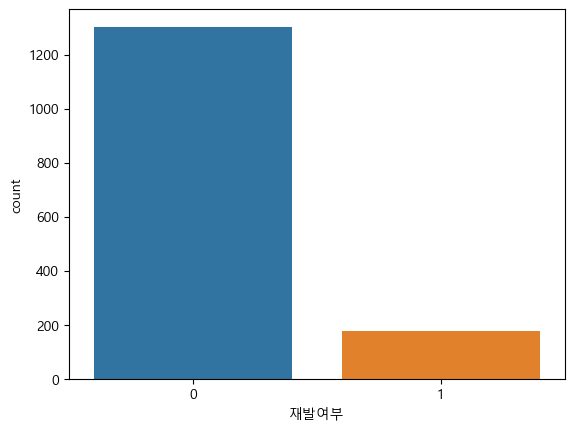

In [8]:
# 데이터 타입과 분포

sns.countplot(data=nn_pat_df_ROS, x='재발여부')

In [9]:
# object로 변환할 데이터 확인 : 성별, 심혈관질환, 흡연여부, 재발여부

nn_pat_df_ROS.dtypes

성별         int64
신장         int64
심혈관질환      int64
체중       float64
흡연여부       int64
연령         int64
직업        object
혈액형       object
재발여부       int64
dtype: object

In [10]:
nn_pat_df_ROS[['성별', '심혈관질환', '흡연여부', '재발여부']]=nn_pat_df_ROS[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object)

C:\Users\01-03\AppData\Local\Temp\ipykernel_16788\1631779541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_pat_df_ROS[['성별', '심혈관질환', '흡연여부', '재발여부']]=nn_pat_df_ROS[['성별', '심혈관질환', '흡연여부', '재발여부']].astype(object)


In [11]:
nn_pat_df_ROS.dtypes

성별        object
신장         int64
심혈관질환     object
체중       float64
흡연여부      object
연령         int64
직업        object
혈액형       object
재발여부      object
dtype: object

In [12]:
# 연속형 데이터 확인
conlist_pat=nn_pat_df_ROS.describe().columns.to_list()
conlist_pat

['신장', '체중', '연령']

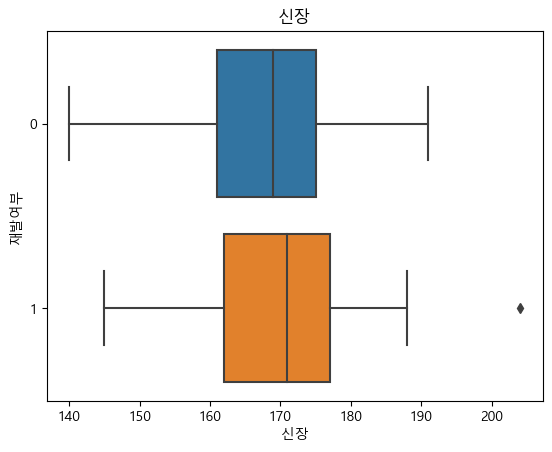

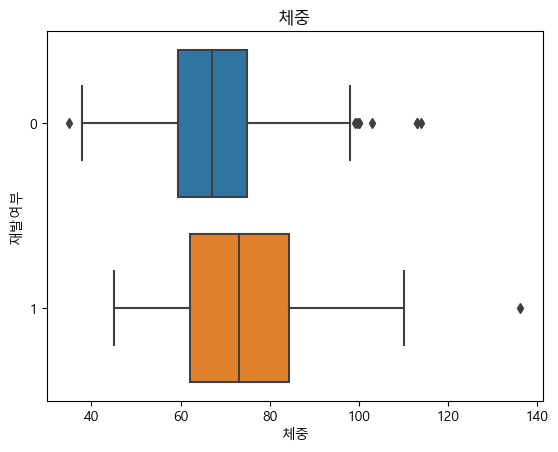

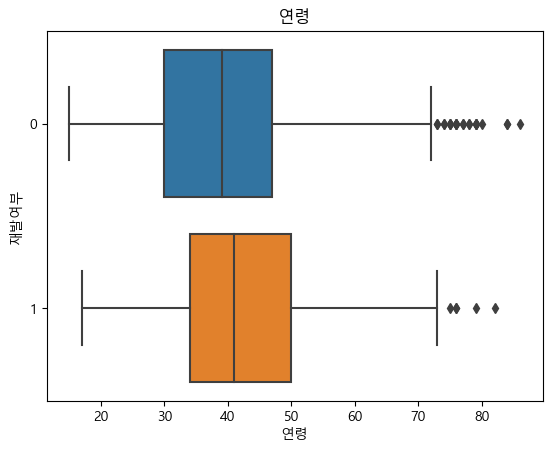

In [48]:
# x: 연속형/ y: 범주형
for item in conlist_pat :
    sns.boxplot(nn_pat_df_ROS, x=item, y='재발여부', orient = 'h')
    plt.title(item)
    plt.show()

In [36]:
# 범주 데이터 확인 (목표변수 제외)
objlist_pat=nn_pat_df_ROS.describe(include=object).drop(columns=['재발여부']).columns.to_list()
objlist_pat

['성별', '심혈관질환', '흡연여부', '직업', '혈액형']

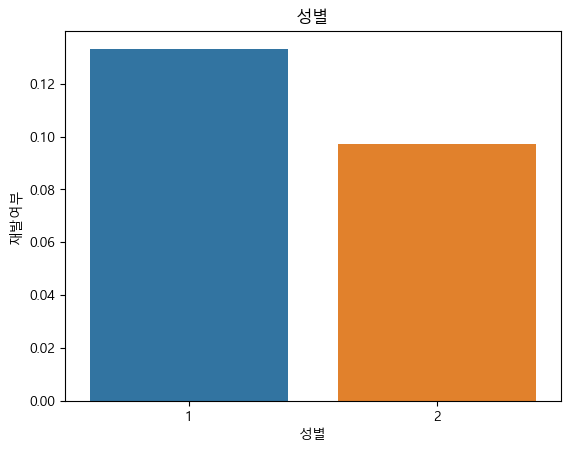

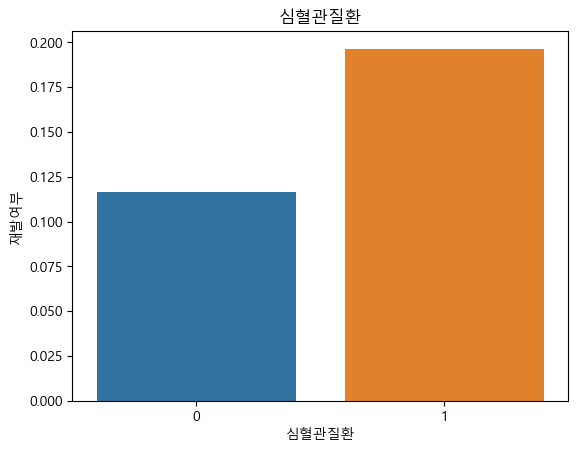

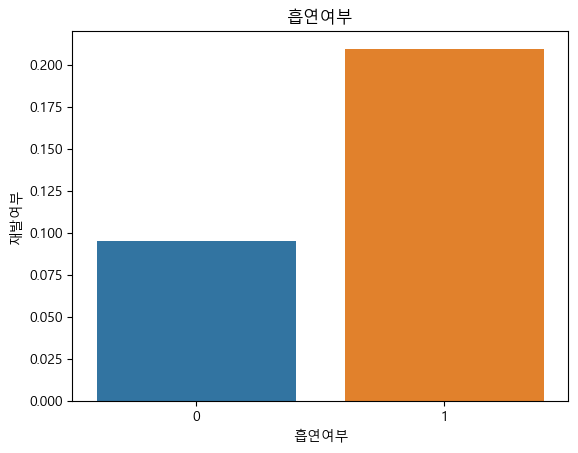

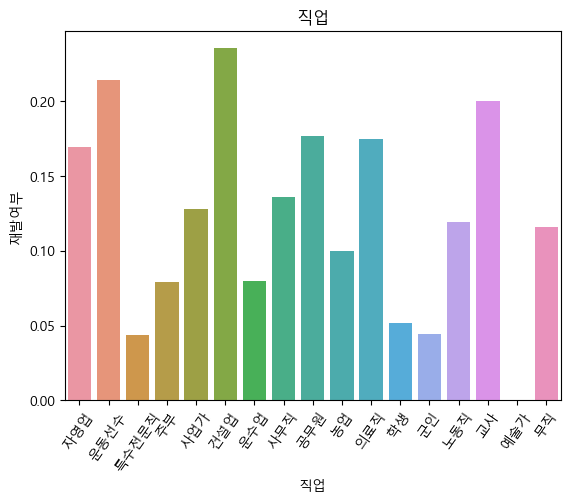

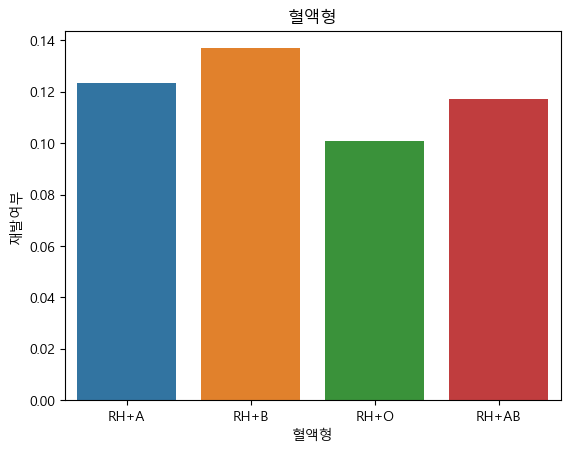

In [47]:
# x: 범주형/ y: 범주형
for item in objlist_pat :
    sns.barplot(nn_pat_df_ROS, x=item, y='재발여부', errorbar=None)
    plt.title(item)
    if item == '직업':
        plt.xticks(rotation=55)
    plt.show()
    